In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
train_data = pd.read_csv("usa-housing-train-preprocessed.csv" , index_col=0)
train_data.shape

(3500, 6)

In [ ]:
X_train = train_data.drop("Price" , axis=1)
y_train = train_data["Price"]


y_train = np.array(y_train).reshape(-1,1)

In [ ]:
ones = np.ones((X_train.shape[0],1))
X_train = np.hstack((ones , X_train))

In [ ]:
def multiple_linear_regression(X,W):
    y = X @ W
    return y

In [ ]:
def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss

In [ ]:
def mape(y, y_hat):
    loss = np.mean(np.abs((y - y_hat) / y) * 100)
    return loss

In [ ]:
def gradient(x , y_hat , y):
    x = x.reshape(-1,1)
    grads = 2 * (y_hat - y) * x / x.shape[0] 
    return grads

# dividing by x.shape[0] normalizes the gradient which leads to more consistent updates and improved model accuracy.
# in this case, it resulted in a 15% accuracy improvement

In [ ]:
def gradient_descent(W , eta , grads):
    W -= eta*grads
    return W

In [ ]:
def R2(y, y_hat):
    return 1 - np.sum((y -y_hat)**2) / np.sum((y - y.mean())**2)

In [ ]:
epoch = 1000
eta = 0.1
W = np.random.randn(X_train.shape[1], 1)
tol = 1e-5
best_loss = float('inf')  # the first value for best loss
n_iter_no_change = 5 # epochs without improvement before stopping
no_change = 0
error_history = [] # this is used for plotting the errors

for i in range(epoch):
    error_history_per_epoch = [] # reset error history for the new epoch
    for x in  range(len(X_train)):
        y_hat = multiple_linear_regression(X_train[x], W)
        error = mse(y_hat=y_hat, y=y_train[x]) # calculate the error
        error_history_per_epoch.append(error)
        grads = gradient(X_train[x], y_hat, y_train[x]) 
        W = gradient_descent(W, eta, grads) # update the coefficients

    error_history_per_epoch = np.mean(error_history_per_epoch)
    error_history.append(error_history_per_epoch) 
    print(f"epoch: {i} , error: {error_history_per_epoch}")
    if error_history_per_epoch > best_loss - tol:
        if no_change >= n_iter_no_change:
            break
        else:
            no_change += 1

    else:
        best_loss = error_history_per_epoch
        no_change = 0


epohc: 0 , error: 0.04892784453917902
epohc: 1 , error: 0.011512614818511038
epohc: 2 , error: 0.011512614818511038
epohc: 3 , error: 0.011512614818511038
epohc: 4 , error: 0.011512614818511038
epohc: 5 , error: 0.011512614818511038
epohc: 6 , error: 0.011512614818511038
epohc: 7 , error: 0.011512614818511038


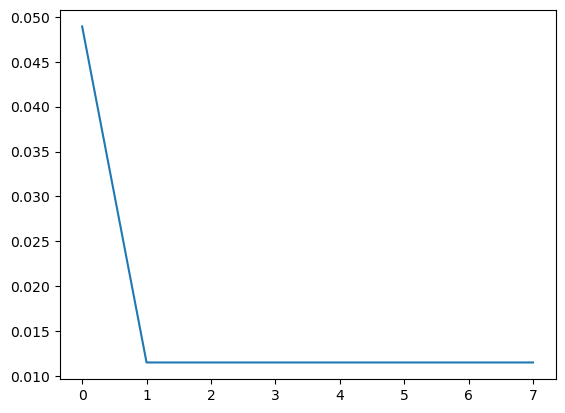

In [ ]:
plt.plot(error_history)

In [ ]:
# evaluation on train data
pred = multiple_linear_regression(X_train , W)
R2_SCORE = R2(y_train , pred)
mean_squared_error = mse(y_train , pred)
mean_absolute_percentage_error = mape(y_train, pred)
print("evaluation on train data:\n")
print(f"R2: {R2_SCORE*100}")
print(f"MSE: {mean_squared_error}")
print(f"MAPE: {mean_absolute_percentage_error}")

evaluation on train data:

R2: 90.539829833307
MSE: 0.012058929417505937
MAPE: 7.996000870540965


In [ ]:
test_data = pd.read_csv("usa-housing-test-preprocessed.csv" , index_col=0)
test_data.shape

(1500, 6)

In [ ]:
X_test = test_data.drop("Price" , axis=1)
y_test = test_data["Price"]

y_test = np.array(y_test).reshape(-1,1)

In [ ]:
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones , X_test))

In [ ]:
# evaluation on test data
pred = multiple_linear_regression(X_test , W)
R2_SCORE = R2(y_test , pred)
mean_squared_error = mse(y_test, pred)
mean_absolute_percentage_error = mape(y_test, pred)
print("evaluation on test data:\n")
print(f"R2: {R2_SCORE*100}")
print(f"MSE: {mean_squared_error}")
print(f"MAPE: {mean_absolute_percentage_error}")

evaluation on test data:

R2: 89.9289947473298
MSE: 0.011884825943046655
MAPE: 7.621056329362672
